
## PARTE A: 
#### Binary Logistic Regression from Scratch


In [ ]:
# ============================================================
# Logistic Regression from Scratch: Binary, OvA, and Softmax
# ============================================================

!pip -q install ucimlrepo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine

np.random.seed(42)
RANDOM_STATE = 42


In [30]:
heart_disease = fetch_ucirepo(id = 45)
X = heart_disease.data.features 
Y = heart_disease.data.targets

In [3]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [3]:
# Hallamo el numero de valores faltantes
null_stats = []

for col in X.columns:
    total_nulls = X[col].isnull().sum()
    percent_nulls = (total_nulls / len(X)) * 100
    null_stats.append({
        'variable': col,
        'nulos': total_nulls,
        'porcentaje_nulos': round(percent_nulls, 2)
    })

null_summary = pd.DataFrame(null_stats)

null_summary = null_summary.sort_values(by='porcentaje_nulos', ascending=False).reset_index(drop=True)

print("Resumen de valores nulos por columna:")
display(null_summary)


Resumen de valores nulos por columna:


,variable,nulos,porcentaje_nulos
0,ca,4,1.32
1,thal,2,0.66
2,age,0,0.00
3,sex,0,0.00
4,cp,0,0.00
5,trestbps,0,0.00
6,chol,0,0.00
7,fbs,0,0.00
8,restecg,0,0.00
9,thalach,0,0.00


In [6]:
#Reemplazando missing values con la mediana
X = X.fillna(X.median())
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [7]:
Y.isna().sum()
Y.head()

,num
0,0
1,2
2,1
3,0
4,0


,num
0,0
1,2
2,1
3,0
4,0


In [31]:
# Convertimos  etiquetas mayores a 0 en 1, el resto en 0
Y = pd.DataFrame(np.where(Y > 0, 1, 0), columns=Y.columns) 
Y = Y.values.ravel()



In [32]:
Y.shape

(303,)

In [33]:
Y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
print(X['ca'].head())
# a

0    0.0
1    3.0
2    2.0
3    0.0
4    0.0
Name: ca, dtype: float64


In [12]:
# Ver primeras filas de la variable
print(X['ca'].head())

0    0.0
1    3.0
2    2.0
3    0.0
4    0.0
Name: ca, dtype: float64


In [56]:
#Se aplica One-Hot Encoding para transformar las variables categóricas, 
# ya que no existe un orden intrínseco entre sus categorías.
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
X_encoded = pd.get_dummies(data=X, columns=categorical_cols)

X_encoded.insert(0, "Intercepto", 1.0)

X_encoded = X_encoded.apply(pd.to_numeric, downcast='float')
X_encoded = X_encoded.astype('float64')




In [57]:
X_encoded

,Intercepto,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,1.0,63.0,145.0,233.0,150.0,2.3,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,67.0,160.0,286.0,108.0,1.5,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,67.0,120.0,229.0,129.0,2.6,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,37.0,130.0,250.0,187.0,3.5,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,41.0,130.0,204.0,172.0,1.4,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,45.0,110.0,264.0,132.0,1.2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,1.0,68.0,144.0,193.0,141.0,3.4,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,1.0,57.0,130.0,131.0,115.0,1.2,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,1.0,57.0,130.0,236.0,174.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,  
    Y,          
    train_size=0.7,
    shuffle=True,
    random_state=5102025
)


In [59]:
X_train.shape

(212, 29)

In [60]:
y_train.shape

(212,)

In [61]:
# Normalización de variables numéricas
columnas_numericas = ["age", "trestbps", "chol", "thalach", "oldpeak"]

media_train = X_train[columnas_numericas].mean()
desviacion_train = X_train[columnas_numericas].std()

X_train.loc[:, columnas_numericas] = (X_train[columnas_numericas] - media_train) / desviacion_train
X_test.loc[:, columnas_numericas] = (X_test[columnas_numericas] - media_train) / desviacion_train


In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 139 to 50
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Intercepto  212 non-null    float64
 1   age         212 non-null    float64
 2   trestbps    212 non-null    float64
 3   chol        212 non-null    float64
 4   thalach     212 non-null    float64
 5   oldpeak     212 non-null    float64
 6   sex_0       212 non-null    float64
 7   sex_1       212 non-null    float64
 8   cp_1        212 non-null    float64
 9   cp_2        212 non-null    float64
 10  cp_3        212 non-null    float64
 11  cp_4        212 non-null    float64
 12  fbs_0       212 non-null    float64
 13  fbs_1       212 non-null    float64
 14  restecg_0   212 non-null    float64
 15  restecg_1   212 non-null    float64
 16  restecg_2   212 non-null    float64
 17  exang_0     212 non-null    float64
 18  exang_1     212 non-null    float64
 19  slope_1     212 non-null    float

2. Model Derivation and Implementation

In [ ]:
#Calculamos la probabilidad predicha, la log-verosimilitud y su gradiente en regresión logística.

def sigmoid_func(z):
    return 1 / (1 + np.exp(-z))

def predict_prob(X, weights):
    """Calcula la probabilidad predicha para datos X con parámetros weights."""
    return sigmoid_func(np.dot(X, weights))

def compute_log_likelihood(weights, X, y):
    """Calcula la log-verosimilitud media con suavizado numérico para evitar log(0)."""
    preds = predict_prob(X, weights)
    epsilon = 1e-6
    return np.mean(y * np.log(preds + epsilon) + (1 - y) * np.log(1 - preds + epsilon))

def compute_gradient(weights, X, y):
    """Calcula el gradiente de la log-verosimilitud para la regresión logística."""
    preds = predict_prob(X, weights)
    
    return np.mean((preds - y)[:, np.newaxis] * X, axis=0)


In [ ]:
#Creamos las clases que implementa regresión logística mediante descenso de gradiente con seguimiento de convergencia.
class LogisticGradientDescent:
    def __init__(self, learning_rate, X_train, y_train, tol=1e-5):
        self.lr = learning_rate
        self.X = np.array(X_train)
        self.y = np.array(y_train)
        self.tolerance = tol
        self.theta = np.zeros(self.X.shape[1])
        self.theta_old = np.ones(self.X.shape[1]) * np.inf  # Valor inicial para evitar corte prematuro
        self.iteration = 0
        self.loss_history = []
        self.coefficients = None

    def fit(self):
        print(f"===== Entrenando con learning rate = {self.lr:.4f} =====")
        while np.linalg.norm(self.theta - self.theta_old) > self.tolerance:
            current_loss = compute_log_likelihood(self.theta, self.X, self.y)
            self.loss_history.append(current_loss)

            if self.iteration % 500 == 0:
                print(f"Iteración {self.iteration}: Log-verosimilitud = {current_loss:.6f}")

            self.theta_old = self.theta.copy()
            grad = compute_gradient(self.theta, self.X, self.y)
            self.theta = self.theta_old - self.lr * grad
            self.iteration += 1

        self.coefficients = self.theta.copy()
        print(f"\nCoeficientes finales:\n{self.coefficients}")
        print(f"Número total de iteraciones: {self.iteration}")


===== Entrenando con learning rate = 0.1000 =====
Iteración 0: Log-verosimilitud = -0.693145
Iteración 500: Log-verosimilitud = -0.324531
Iteración 1000: Log-verosimilitud = -0.316345
Iteración 1500: Log-verosimilitud = -0.313732
Iteración 2000: Log-verosimilitud = -0.312568
Iteración 2500: Log-verosimilitud = -0.311939
Iteración 3000: Log-verosimilitud = -0.311546
Iteración 3500: Log-verosimilitud = -0.311270
Iteración 4000: Log-verosimilitud = -0.311058
Iteración 4500: Log-verosimilitud = -0.310883
Iteración 5000: Log-verosimilitud = -0.310733
Iteración 5500: Log-verosimilitud = -0.310599
Iteración 6000: Log-verosimilitud = -0.310477
Iteración 6500: Log-verosimilitud = -0.310363
Iteración 7000: Log-verosimilitud = -0.310258
Iteración 7500: Log-verosimilitud = -0.310158
Iteración 8000: Log-verosimilitud = -0.310063
Iteración 8500: Log-verosimilitud = -0.309972
Iteración 9000: Log-verosimilitud = -0.309886
Iteración 9500: Log-verosimilitud = -0.309803
Iteración 10000: Log-verosimilitud

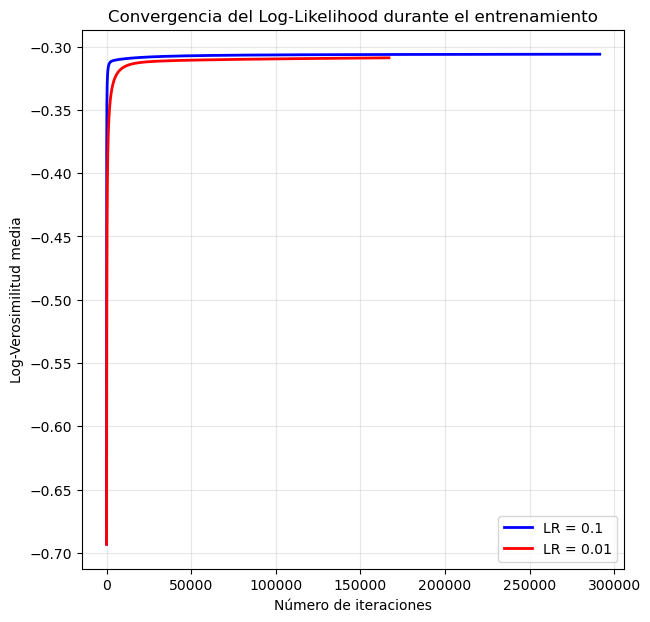

                   0
Intercepto -1.309065
age        -0.386715
trestbps    0.716105
chol        0.192867
thalach    -0.919874
oldpeak     0.204574
sex_0      -1.478245
sex_1       0.169181
cp_1       -1.492980
cp_2       -0.902298
cp_3       -0.220775
cp_4        1.306988
fbs_0      -0.650637
fbs_1      -0.658427
restecg_0  -2.145467
restecg_1   2.504097
restecg_2  -1.667694
exang_0    -1.010511
exang_1    -0.298554
slope_1    -0.533597
slope_2     0.027751
slope_3    -0.803219
ca_0.0      2.089566
ca_1.0      3.561698
ca_2.0      5.487800
ca_3.0      4.117644
thal_3.0    1.234959
thal_6.0    1.369863
thal_7.0    2.642418


In [ ]:
# Realizamos el entrenamiento y comparación visual de modelos con dos tasas de 
# aprendizaje distintas mediante descenso de gradiente
lr_high = 0.1
model_high = LogisticGradientDescent(lr_high, X_train, y_train)
model_high.fit()

lr_low = 0.01
model_low = LogisticGradientDescent(lr_low, X_train, y_train)
model_low.fit()

plt.figure(figsize=(7, 7))
plt.plot(model_high.loss_history, label=f'LR = {lr_high}', color='blue', linewidth=2)
plt.plot(model_low.loss_history, label=f'LR = {lr_low}', color='red', linewidth=2)
plt.title('Convergencia del Log-Likelihood durante el entrenamiento')
plt.xlabel('Número de iteraciones')
plt.ylabel('Log-Verosimilitud media')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Finalmente mostramos los  coeficientes del modelo con learning rate 0.1
coef_df = pd.DataFrame(model_high.coefficients.reshape(1, -1), columns=X_train.columns)
print(coef_df.T)


3. Evaluation

In [70]:
def show_metric(my_metric):
  return "{:.2f}%".format(my_metric * 100)

In [71]:
#Evaluamos el rendimiento del modelo de regresión logística implementado con 
#descenso de gradiente (learning rate = 0.01)
def show_metric(my_metric):
    return "{:.2f}%".format(my_metric * 100)

y_pred_prob = predict_prob(X_test, model_low.coefficients)

# Convertirmos probabilidades en clases (0 o 1)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

print("accuracy: {}".format(show_metric(accuracy_score(y_test, y_pred_class))))
print("precision: {}".format(show_metric(precision_score(y_test, y_pred_class))))
print("recall: {}".format(show_metric(recall_score(y_test, y_pred_class))))
print("F1 score: {}".format(show_metric(f1_score(y_test, y_pred_class))))
print("matriz de confusion: \n", confusion_matrix(y_test, y_pred_class))


accuracy: 86.81%
precision: 92.68%
recall: 80.85%
F1 score: 86.36%
matriz de confusion: 
 [[41  3]
 [ 9 38]]


In [72]:

#Evaluamos el modelo de regresión logística de sklearn sin intercepto en el 
# conjunto de prueba
model_sklearn = LogisticRegression(fit_intercept=False, max_iter=1000, solver='lbfgs')
model_sklearn.fit(X_train, y_train)

y_pred_sklearn = model_sklearn.predict(X_test)

print("sklearn - Accuracy: {}".format(show_metric(accuracy_score(y_test, y_pred_sklearn))))
print("sklearn - Precision: {}".format(show_metric(precision_score(y_test, y_pred_sklearn))))
print("sklearn - Recall: {}".format(show_metric(recall_score(y_test, y_pred_sklearn))))
print("sklearn - F1 Score: {}".format(show_metric(f1_score(y_test, y_pred_sklearn))))


sklearn - Accuracy: 85.71%
sklearn - Precision: 92.50%
sklearn - Recall: 78.72%
sklearn - F1 Score: 85.06%


## Part B:
#### Multiclass Logistic Regression via One-vs-All (OvA)


In [76]:
# --- B.4 Dataset (Wine) + escalado ---
data = load_wine()
Xw = pd.DataFrame(data.data, columns=data.feature_names)
yw = pd.Series(data.target, name="class")

_rs = RANDOM_STATE if "RANDOM_STATE" in globals() else 42
Xw_train, Xw_test, yw_train, yw_test = train_test_split(
    Xw, yw, test_size=0.30, stratify=yw, random_state=_rs
)

scaler_w = StandardScaler()
Xw_train_s = scaler_w.fit_transform(Xw_train)
Xw_test_s  = scaler_w.transform(Xw_test)

def add_bias(A):
    return np.c_[np.ones((A.shape[0], 1)), A]

Xtr = add_bias(Xw_train_s)
Xte = add_bias(Xw_test_s)
classes = np.unique(yw_train)


In [ ]:
# --- B.5 OvA  ---

def _ensure_funcs():
    req = ["sigmoid", "nll", "grad", "fit_gd"]
    return all(name in globals() for name in req)

if not _ensure_funcs():
    def sigmoid(z):
        z = np.clip(z, -30, 30)
        return 1.0 / (1.0 + np.exp(-z))
    def nll(X, y, w, l2=0.0):
        p = sigmoid(X @ w); eps = 1e-12
        loss = -(y*np.log(p + eps) + (1 - y)*np.log(1 - p + eps)).mean()
        if l2 > 0: loss += (l2/(2*X.shape[0])) * np.sum(w[1:]**2)
        return loss
    def grad(X, y, w, l2=0.0):
        p = sigmoid(X @ w)
        g = (X.T @ (p - y)) / X.shape[0]
        if l2 > 0: g[1:] += (l2/X.shape[0]) * w[1:]
        return g
    def fit_gd(X, y, lr=5e-3, n_iter=2000, l2=0.0, log_every=10):
        w = np.zeros(X.shape[1]); hist = []
        for t in range(n_iter):
            w -= lr * grad(X, y, w, l2)
            if (t % log_every) == 0 or t == n_iter - 1:
                hist.append(nll(X, y, w, l2))
        return w, np.array(hist), log_every


LR_OVA = 5e-3
weights_ova, hist_ova = {}, {}
for k in classes:
    yk = (yw_train.to_numpy() == k).astype(int)
    wk, hk, step = fit_gd(Xtr, yk, lr=LR_OVA, n_iter=2000, l2=0.0, log_every=10)
    weights_ova[k] = wk
    hist_ova[k] = hk


probas = np.column_stack([1.0 / (1.0 + np.exp(-(Xte @ weights_ova[k]))) for k in classes])
yhat_ova = classes[probas.argmax(axis=1)]


acc_ova = accuracy_score(yw_test, yhat_ova)
cm_ova  = confusion_matrix(yw_test, yhat_ova)
print("OvA (scratch) — accuracy:", round(acc_ova, 4))
print("Matriz de confusión (OvA scratch):\n", cm_ova)
try:
    print("\nReporte de clasificación (OvA scratch):\n",
          classification_report(yw_test, yhat_ova, digits=4))
except Exception:
    pass


OvA (scratch) — accuracy: 0.963
Matriz de confusión (OvA scratch):
 [[18  0  0]
 [ 0 19  2]
 [ 0  0 15]]

Reporte de clasificación (OvA scratch):
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        18
           1     1.0000    0.9048    0.9500        21
           2     0.8824    1.0000    0.9375        15

    accuracy                         0.9630        54
   macro avg     0.9608    0.9683    0.9625        54
weighted avg     0.9673    0.9630    0.9632        54



In [ ]:
# --- B.6 Comparación con sklearn (OvR) + coeficientes ---

from sklearn.multiclass import OneVsRestClassifier  # evita warning deprecado

base_lr = LogisticRegression(solver="lbfgs", max_iter=5000, C=1.0, random_state=_rs)
sk_ova = OneVsRestClassifier(base_lr)
sk_ova.fit(Xw_train_s, yw_train)
yhat_sk = sk_ova.predict(Xw_test_s)

acc_sk = accuracy_score(yw_test, yhat_sk)
cm_sk  = confusion_matrix(yw_test, yhat_sk)
print("sklearn OvR — accuracy:", round(acc_sk, 4))
print("Matriz de confusión (sklearn OvR):\n", cm_sk)
try:
    print("\nReporte de clasificación (sklearn OvR):\n",
          classification_report(yw_test, yhat_sk, digits=4))
except Exception:
    pass

feat = ["bias"] + list(data.feature_names)

coef_scr = {k: pd.Series(weights_ova[k], index=feat) for k in classes}

coef_sk = {}
for i, k in enumerate(classes):
    est = sk_ova.estimators_[i]       
    w_k = np.r_[est.intercept_[0], est.coef_[0]]
    coef_sk[k] = pd.Series(w_k, index=feat)

for k in classes:
    top = coef_scr[k].abs().sort_values(ascending=False).head(5).index
    tabla = pd.DataFrame({"scratch": coef_scr[k].loc[top],
                          "sklearn": coef_sk[k].loc[top]}).round(4)
    print(f"\nClase {k} — Top-5 |coef| (scratch vs sklearn):")
    print(tabla)

# (Opcional) Resumen de accuracies en una tablita
pd.DataFrame({"accuracy": [acc_ova, acc_sk]},
             index=["OvA (scratch)", "sklearn OvR"]).round(4)


sklearn OvR — accuracy: 0.9815
Matriz de confusión (sklearn OvR):
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Reporte de clasificación (sklearn OvR):
               precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        18
           1     1.0000    0.9524    0.9756        21
           2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815        54


Clase 0 — Top-5 |coef| (scratch vs sklearn):
                   scratch  sklearn
proline             0.9845   1.5710
alcohol             0.8056   1.2798
bias               -0.7672  -1.7864
alcalinity_of_ash  -0.7014  -1.3634
flavanoids          0.6030   1.1154

Clase 1 — Top-5 |coef| (scratch vs sklearn):
                 scratch  sklearn
alcohol          -0.9946  -1.4811
color_intensity  -0.8968  -1.4694
proline          -0.8727  -1.5622
ash              -0.5682  -1.

,accuracy
OvA (scratch),0.9630
sklearn OvR,0.9815


## PARTE: C

### Derivación del Gradiente — Verosimilitud Logarítmica Multiclase

Para un modelo con parámetros :

$$
L(\theta) = \prod_{i=1}^n 
\frac{\exp(\theta_{y^{(i)}}^\top x^{(i)})}
{\sum_{l=1}^K \exp(\theta_l^\top x^{(i)})}.
$$

Tomando logaritmos:

$$
\ell(\theta) = \sum_{i=1}^n 
\Big[
\theta_{y^{(i)}}^\top x^{(i)} -
\log\!\left(\sum_{j=1}^K e^{\theta_j^\top x^{(i)}}\right)
\Big].
$$

---

### Derivada con respecto a la clase \( m \)

**1. Primer término**

$$
\frac{\partial}{\partial \theta_m}(\theta_{y^{(i)}}^\top x^{(i)}) 
= \mathbb{1}\{y^{(i)} = m\}\, x^{(i)}.
$$

**2. Segundo término**

$$
\frac{\partial}{\partial \theta_m}
\Big[-\log\!\big(\sum_{j=1}^K e^{\theta_j^\top x^{(i)}}\big)\Big]
= -\frac{e^{\theta_m^\top x^{(i)}}}{\sum_{j=1}^K e^{\theta_j^\top x^{(i)}}}
\, x^{(i)} = -p_{im}x^{(i)}.
$$

---

### Combinando ambos términos

$$
\frac{\partial \ell(\theta)}{\partial \theta_m}
= \sum_{i=1}^n 
\big(\mathbb{1}\{y^{(i)} = m\} - p_{im}\big)x^{(i)}.
$$

---

### Gradiente final

$$
\boxed{
\nabla_{\theta_m}\ell(\theta)
= \sum_{i=1}^n 
\left(\mathbb{1}\{y^{(i)} = m\} - p_{im}\right)x^{(i)}
}
$$




In [84]:
data = load_wine()
XC = pd.DataFrame(data.data, columns=data.feature_names)
yC = pd.Series(data.target, name="class")

_rs = RANDOM_STATE if "RANDOM_STATE" in globals() else 42
XC_train, XC_test, yC_train, yC_test = train_test_split(
    XC, yC, test_size=0.30, stratify=yC, random_state=_rs
)

scalerC = StandardScaler()
XC_train_s = scalerC.fit_transform(XC_train)
XC_test_s  = scalerC.transform(XC_test)

def add_bias(A):
    return np.c_[np.ones((A.shape[0], 1)), A]

XtrC = add_bias(XC_train_s)
XteC = add_bias(XC_test_s)

classesC = np.unique(yC_train)                   
K = len(classesC)
d1 = XtrC.shape[1]

In [85]:
# --- C.3 Softmax multinomial ---

index_of = {c:i for i,c in enumerate(classesC)}
ytr_idx = np.vectorize(index_of.get)(yC_train.to_numpy())
yte_idx = np.vectorize(index_of.get)(yC_test.to_numpy())

def one_hot(y_idx, K):
    Y = np.zeros((y_idx.shape[0], K))
    Y[np.arange(y_idx.shape[0]), y_idx] = 1.0
    return Y

Ytr_one = one_hot(ytr_idx, K)

def softmax_stable(Z):
    Z = Z - Z.max(axis=1, keepdims=True)       
    np.exp(Z, out=Z)                           
    Z /= Z.sum(axis=1, keepdims=True)
    return Z

def nll_multiclass(X, Y_one, W, l2=0.0):
    P = softmax_stable(X @ W.T)
    eps = 1e-12
    loss = -(Y_one * np.log(P + eps)).sum(axis=1).mean()
    if l2 > 0:
        loss += (l2/(2*X.shape[0])) * np.sum(W[:,1:]**2)
    return loss

def grad_W(X, Y_one, W, l2=0.0):
    P = softmax_stable(X @ W.T)
    G = ((P - Y_one).T @ X) / X.shape[0]       
    if l2 > 0:
        G[:,1:] += (l2/X.shape[0]) * W[:,1:]
    return G

def fit_gd_softmax(X, Y_one, lr=5e-3, n_iter=2000, l2=0.0, log_every=10):
    W = np.zeros((K, d1))
    hist = []
    for t in range(n_iter):
        W -= lr * grad_W(X, Y_one, W, l2)
        if (t % log_every) == 0 or t == n_iter - 1:
            hist.append(nll_multiclass(X, Y_one, W, l2))
    return W, np.array(hist), log_every

def predict_proba_softmax(X, W):
    return softmax_stable(X @ W.T)

def predict_label_softmax(X, W):
    return predict_proba_softmax(X, W).argmax(axis=1)

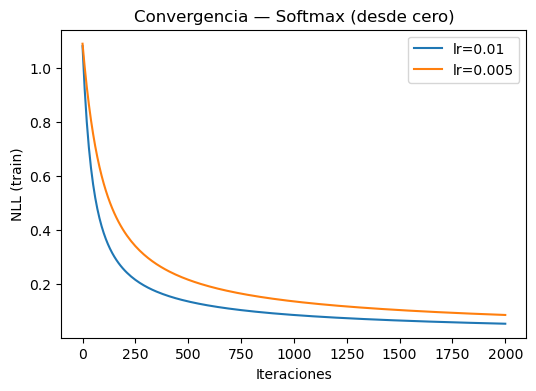

In [ ]:
# --- C.4 Entrenar con dos learning rates y graficar convergencia ---
lrsC = [1e-2, 5e-3]     
histC = {}
WC = {}

plt.figure(figsize=(6,4))
for lr in lrsC:
    Wlr, Hlr, step = fit_gd_softmax(XtrC, Ytr_one, lr=lr, n_iter=2000, l2=0.0, log_every=10)
    WC[lr] = Wlr
    histC[lr] = Hlr
    it_axis = np.arange(len(Hlr)) * step
    plt.plot(it_axis, Hlr, label=f"lr={lr}")
plt.xlabel("Iteraciones"); plt.ylabel("NLL (train)")
plt.title("Convergencia — Softmax (desde cero)")
plt.legend(); plt.show()

best_lrC = min(lrsC, key=lambda a: histC[a][-1])
W_best = WC[best_lrC]

In [ ]:
# --- C.5 Evaluación del modelo softmax scratch ---
yhat_idx = predict_label_softmax(XteC, W_best)
yhat_softmax = classesC[yhat_idx]                 

acc_soft = accuracy_score(yC_test, yhat_softmax)
cm_soft  = confusion_matrix(yC_test, yhat_softmax)
print("Softmax (scratch) — accuracy:", round(acc_soft, 4))
print("Matriz de confusión (Softmax scratch):\n", cm_soft)
print("\nReporte de clasificación (Softmax scratch):\n",
      classification_report(yC_test, yhat_softmax, digits=4))

Softmax (scratch) — accuracy: 0.9815
Matriz de confusión (Softmax scratch):
 [[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]

Reporte de clasificación (Softmax scratch):
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        18
           1     1.0000    0.9524    0.9756        21
           2     0.9375    1.0000    0.9677        15

    accuracy                         0.9815        54
   macro avg     0.9792    0.9841    0.9811        54
weighted avg     0.9826    0.9815    0.9816        54



In [88]:
# --- C.6 Comparación con sklearn (multinomial) ---
sk_multi = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                              max_iter=5000, C=1.0, random_state=_rs)
sk_multi.fit(XC_train_s, yC_train)
yhat_sk_mul = sk_multi.predict(XC_test_s)

acc_sk_mul = accuracy_score(yC_test, yhat_sk_mul)
cm_sk_mul  = confusion_matrix(yC_test, yhat_sk_mul)
print("\nsklearn multinomial — accuracy:", round(acc_sk_mul, 4))
print("Matriz de confusión (sklearn multinomial):\n", cm_sk_mul)
print("\nReporte de clasificación (sklearn multinomial):\n",
      classification_report(yC_test, yhat_sk_mul, digits=4))


sklearn multinomial — accuracy: 0.9815
Matriz de confusión (sklearn multinomial):
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Reporte de clasificación (sklearn multinomial):
               precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        18
           1     1.0000    0.9524    0.9756        21
           2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815        54

